https://www.kaggle.com/isaaclys/eda-to-prediction-dietanic-korean-translation

## EDA

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')

In [62]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [5]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

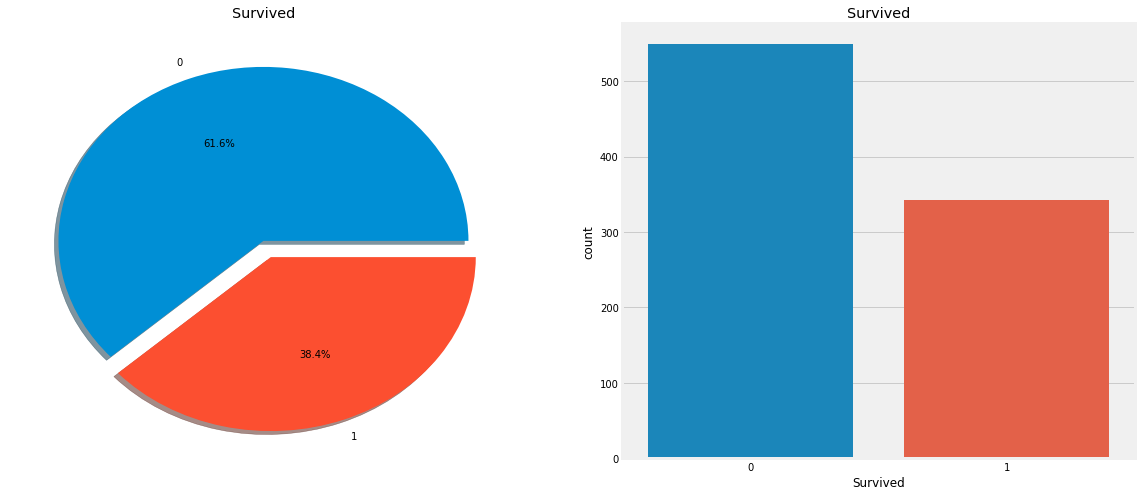

In [6]:
f, ax = plt.subplots(1, 2, figsize = (18, 8))
train['Survived'].value_counts().plot.pie(explode = [0, 0.1], autopct = '%.1f%%', ax = ax[0], shadow = True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot('Survived', data = train, ax= ax[1])
ax[1].set_title('Survived')
plt.show()

In [7]:
train.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

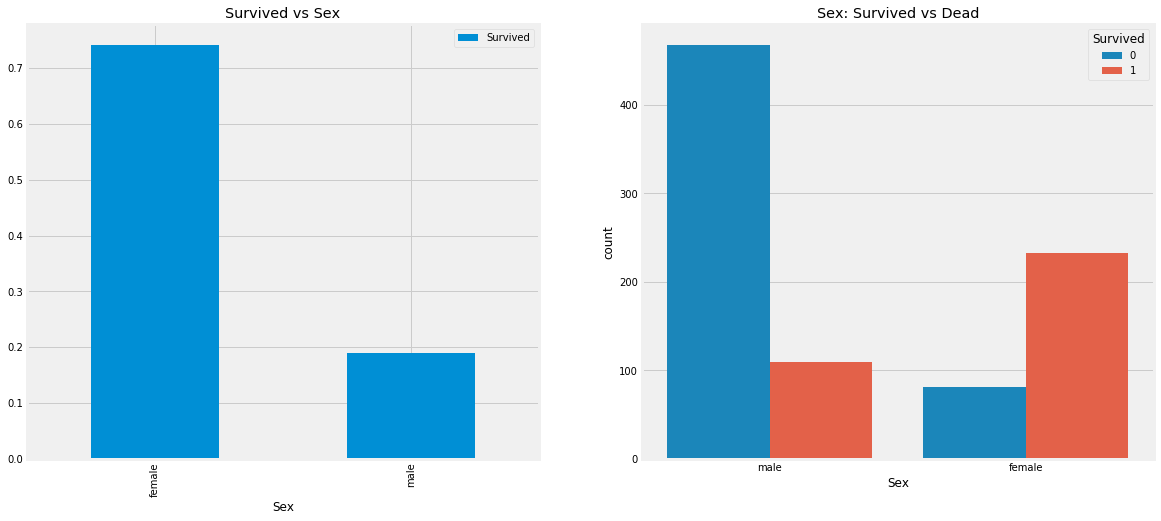

In [8]:
f, ax = plt.subplots(1, 2, figsize = (18, 8))
train[['Sex', 'Survived']].groupby(['Sex']).mean().plot.bar(ax = ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex', hue = 'Survived', data = train, ax = ax[1])
ax[1].set_title('Sex: Survived vs Dead')
plt.show()

## Pclass -> Ordinal Feature

In [9]:
pd.crosstab(train['Pclass'], train['Survived'], margins = True).style.background_gradient(cmap = 'summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


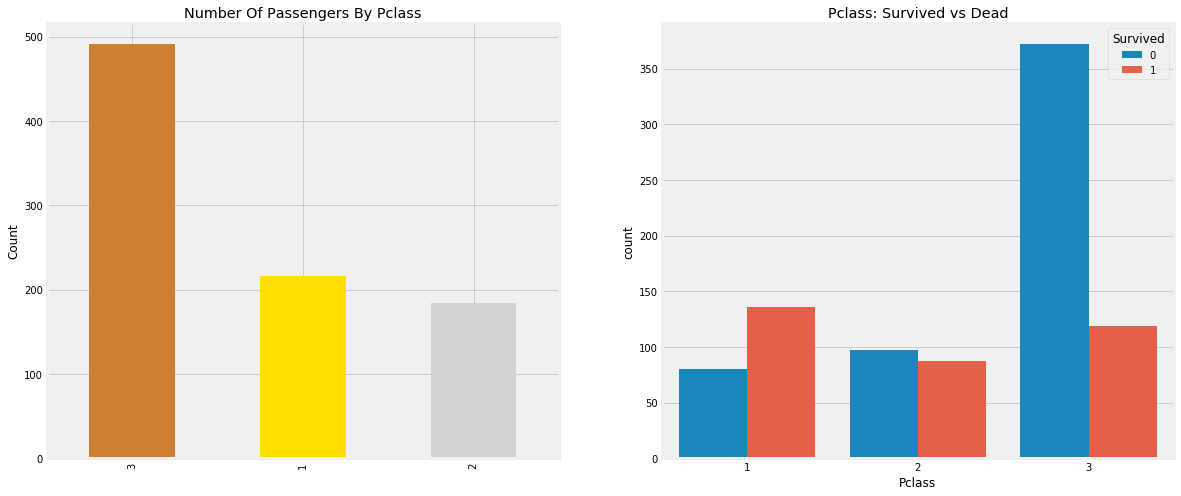

In [10]:
f, ax = plt.subplots(1, 2, figsize = (18, 8))
train['Pclass'].value_counts().plot.bar(color = ['#CD7F32', '#FFDF00', '#D3D3D3'], ax = ax[0])
ax[0].set_title('Number Of Passengers By Pclass')
ax[0].set_ylabel('Count')
sns.countplot('Pclass', hue = 'Survived', data = train, ax = ax[1])
ax[1].set_title('Pclass: Survived vs Dead')
plt.show()

In [11]:
pd.crosstab([train.Sex, train.Survived], train.Pclass, margins = True).style.background_gradient(cmap = 'summer_r')

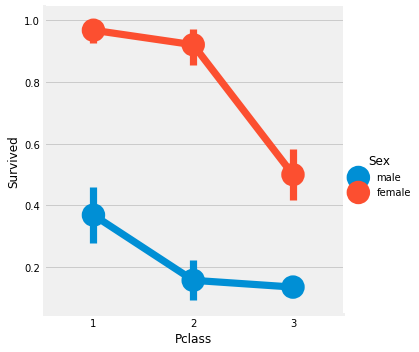

In [12]:
sns.factorplot('Pclass', 'Survived', hue = 'Sex', data = train)
plt.show()

In [13]:
## Age -> Continuous Feature
print('Oldest Passenger was of: {} Years'.format(train['Age'].max()))
print('Youngest Passenger was of: {} Years'.format(train['Age'].min()))
print('Average Age on the ship: {:.2f} Years'.format(train['Age'].mean()))

Oldest Passenger was of: 80.0 Years
Youngest Passenger was of: 0.42 Years
Average Age on the ship: 29.70 Years


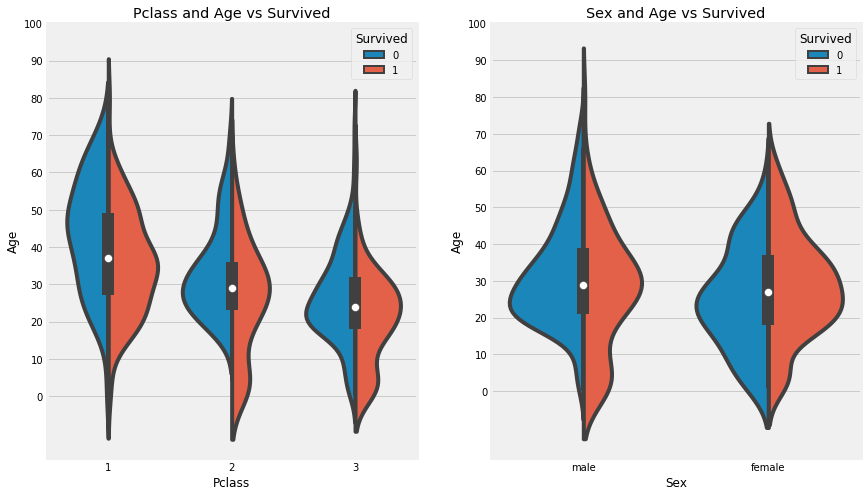

In [14]:
f, ax = plt.subplots(1, 2, figsize = (13, 8))
sns.violinplot('Pclass', 'Age', hue = 'Survived', data = train, split = True, ax = ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0, 110, 10))
sns.violinplot('Sex', 'Age', hue = 'Survived', data = train, split = True, ax = ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0, 110, 10))
plt.show()

In [17]:
## Name Preprocessing

for i in train:
    train['Initial'] = train.Name.str.extract('([A-Za-z]+)\.')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [21]:
pd.crosstab(train.Initial, train.Sex).T.style.background_gradient(cmap = 'summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


## result = Mlle, Mme == Miss typing error

In [23]:
train['Initial'].replace(['Mlle', 'Mme', 'Ms', 'Dr', 'Major', 'Lady', 'Countess', 'Jonkheer', 'Col', 'Rev', 'Capt',
                        'Sir', 'Don'], ['Miss', 'Miss', 'Miss', 'Mr', 'Mr', 'Mrs', 'Mrs', 'Other', 'Other', 'Other', 
                                       'Mr', 'Mr', 'Mr'], inplace = True)

In [24]:
train.groupby('Initial')['Age'].mean()

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

In [26]:
train.loc[(train.Age.isnull()) & (train.Initial == 'Mr'), 'Age']

5     NaN
17    NaN
26    NaN
29    NaN
36    NaN
42    NaN
45    NaN
46    NaN
48    NaN
55    NaN
64    NaN
76    NaN
77    NaN
87    NaN
95    NaN
101   NaN
107   NaN
121   NaN
126   NaN
154   NaN
158   NaN
168   NaN
181   NaN
185   NaN
196   NaN
201   NaN
214   NaN
223   NaN
250   NaN
260   NaN
       ..
656   NaN
667   NaN
674   NaN
692   NaN
711   NaN
718   NaN
732   NaN
738   NaN
739   NaN
740   NaN
760   NaN
766   NaN
768   NaN
773   NaN
776   NaN
778   NaN
783   NaN
790   NaN
793   NaN
815   NaN
825   NaN
826   NaN
828   NaN
832   NaN
837   NaN
839   NaN
846   NaN
859   NaN
868   NaN
878   NaN
Name: Age, Length: 120, dtype: float64

In [27]:
## Fillna Null
train.loc[(train.Age.isnull()) & (train.Initial == 'Mr'), 'Age'] = 33
train.loc[(train.Age.isnull()) & (train.Initial == 'Mrs'), 'Age'] = 36
train.loc[(train.Age.isnull()) & (train.Initial == 'Master'), 'Age'] = 5
train.loc[(train.Age.isnull()) & (train.Initial == 'Miss'), 'Age'] = 22
train.loc[(train.Age.isnull()) & (train.Initial == 'Other'), 'Age'] = 46

In [29]:
train['Age'].isnull().any()

False

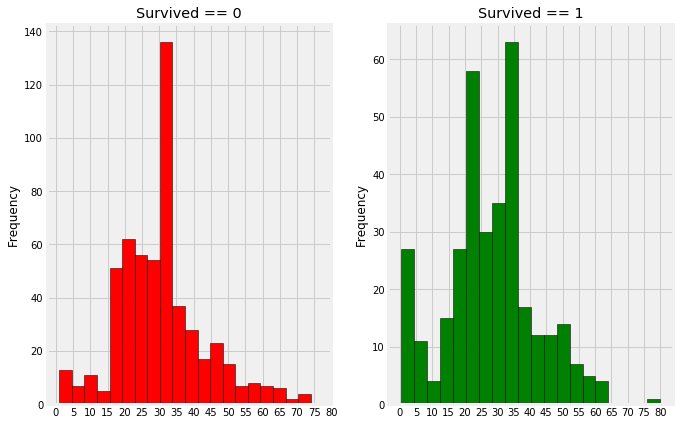

In [34]:
f, ax = plt.subplots(1, 2, figsize = (10, 7))
train[train['Survived'] == 0].Age.plot.hist(ax = ax[0], bins = 20, edgecolor = 'black', color = 'red')
ax[0].set_title('Survived == 0')
x1 = list(range(0, 85, 5))
ax[0].set_xticks(x1)
train[train['Survived'] == 1].Age.plot.hist(ax = ax[1], color = 'green', bins = 20, edgecolor = 'black')
ax[1].set_title('Survived == 1')
x2 = list(range(0, 85, 5))
ax[1].set_xticks(x2)
plt.show()

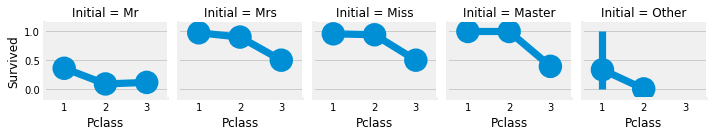

In [61]:
# factorplot size  size=2, aspect=1
sns.factorplot('Pclass', 'Survived', col = 'Initial', data = train, size = 2, aspect = 1)
plt.show()

## Embarked --> Categorical Value

In [68]:
pd.crosstab([train.Embarked, train.Pclass], [train.Sex, train.Survived], margins = True).style.background_gradient(cmap = 'summer_r')

## Chances for Survival by Port Of Embarkation

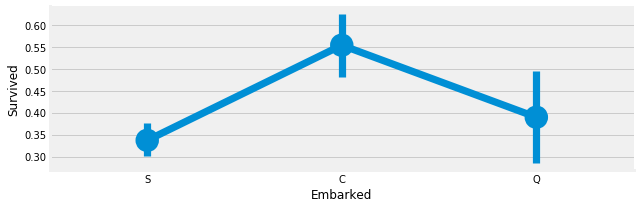

In [71]:
sns.factorplot('Embarked', 'Survived', data =  train, size = 3, aspect = 3)
plt.show()

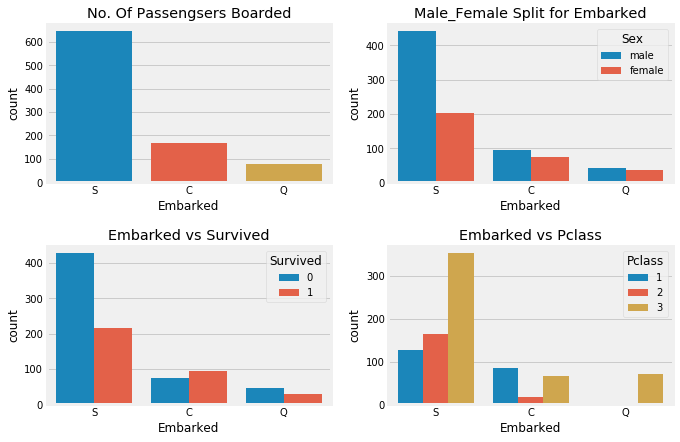

In [80]:
f, ax = plt.subplots(2, 2, figsize = (10, 7))
sns.countplot('Embarked', data = train, ax = ax[0, 0])
ax[0, 0].set_title('No. Of Passengsers Boarded')
sns.countplot('Embarked', data = train, hue = 'Sex', ax = ax[0, 1])
ax[0, 1].set_title('Male_Female Split for Embarked')
sns.countplot('Embarked', data = train, hue = 'Survived', ax = ax[1, 0])
ax[1, 0].set_title('Embarked vs Survived')
sns.countplot('Embarked', data = train, hue = 'Pclass', ax = ax[1, 1])
ax[1, 1].set_title('Embarked vs Pclass')
plt.subplots_adjust(wspace = 0.2, hspace = 0.4)
plt.show()

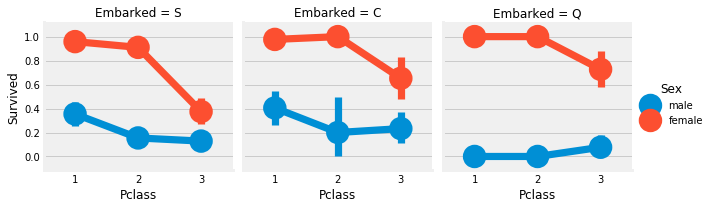

In [97]:
sns.factorplot('Pclass', 'Survived', data = train, hue = 'Sex', col = 'Embarked', size = 3, aspect = 1)

## Fillna Embarked NaN
As we saw that maximum passengers boarded from Port S, we replace NaN with S

In [98]:
train['Embarked'].fillna('S', inplace = True)
train['Embarked'].isnull().any()

False

## Sibsip
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife

In [101]:
pd.crosstab(train.SibSp, train.Survived).style.background_gradient(cmap = 'summer_r')

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


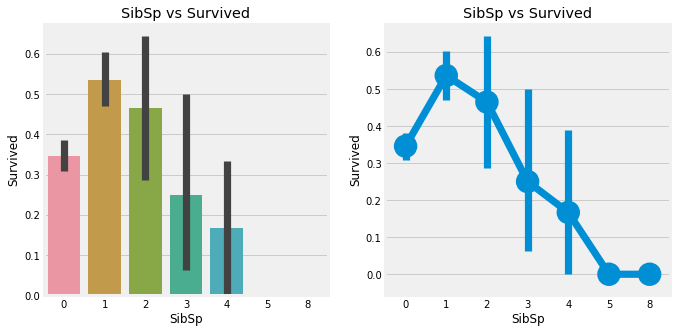

In [148]:
# factorplot을 그릴 경우 도화지가 하나 더 생겨서 plt.close()로 없애줘야 함
f, ax = plt.subplots(1, 2, figsize = (10, 5))
sns.barplot('SibSp', 'Survived', data = train, ax = ax[0])
ax[0].set_title('SibSp vs Survived')
sns.factorplot('SibSp', 'Survived', data = train, ax = ax[1])
ax[1].set_title('SibSp vs Survived')
plt.close(2) # 이유는 모르겠으나 두 번째에 공간 하나가 더 생김 ㅠㅠ
plt.show()

In [127]:
pd.crosstab(train.SibSp, train.Pclass).style.background_gradient(cmap = 'summer_r')

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


In [128]:
# 3명 초과의 동승자가 있는 경우 모두 3등석.

## Parch

In [130]:
pd.crosstab(train.Parch, train.Pclass).style.background_gradient(cmap = 'summer_r')

Pclass,1,2,3
Parch,,,
0,163,134,381
1,31,32,55
2,21,16,43
3,0,2,3
4,1,0,3
5,0,0,5
6,0,0,1


### sibsp와 비슷

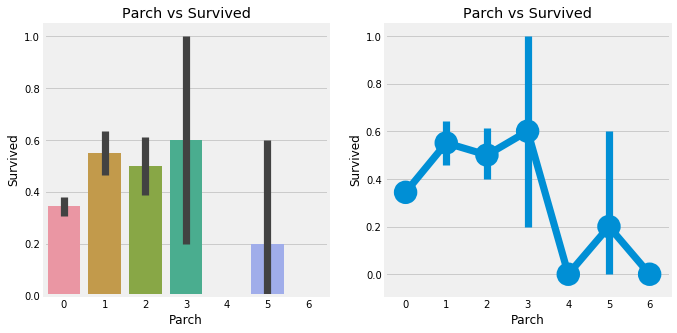

In [140]:
f, ax = plt.subplots(1, 2, figsize = (10, 5))
sns.barplot('Parch', 'Survived', data = train, ax = ax[0])
ax[0].set_title('Parch vs Survived')
sns.factorplot('Parch', 'Survived', data = train, ax = ax[1])
ax[1].set_title('Parch vs Survived')
plt.close(2)
plt.show()

### 인원수 < 4 일 경우 생존확률이 높음, 

## Fare(Continous)

In [147]:
print('Highest Fare was: ', train['Fare'].max())
print('Lowest Fare was: ', train['Fare'].min())
print('Average Fare was: {:.2f}'.format(train['Fare'].mean()))

Highest Fare was:  512.3292
Lowest Fare was:  0.0
Average Fare was: 32.20
